In [16]:
import sklearn; print('The scikit-learn version is {}.'.format(sklearn.__version__))


The scikit-learn version is 0.19.1.


In [17]:
import os
SIGNLANG_PATH = "~/ml/datasets/signLang"

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

# load data function
def load_signLand_data(signLang_path=SIGNLANG_PATH, file="sign_mnist_train.csv"):
    csv_path = os.path.join(signLang_path, file)
    return pd.read_csv(csv_path)

## Load train data
signs_train = load_signLand_data()
#signs.head()
signs_train.info()
print("\nTraining data array shape:signs_t ",signs_train.shape)
#print("Training data length: ",len(signs_train.index))
print("\n")
file_test = "sign_mnist_test.csv"
signs_test = load_signLand_data(SIGNLANG_PATH,file_test)
signs_test.info()
print("\nTesting data array shape:signs_t ",signs_test.shape)
#print("Testing data length: ",len(signs_test.index))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB

Training data array shape:signs_t  (27455, 785)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB

Testing data array shape:signs_t  (7172, 785)


In [18]:
## Process data
#extract labels column into y
y_train = signs_train.loc[:,'label']
y_test = signs_test.loc[:,'label']

#extract pixel array into X
X_train= signs_train
X_train.drop('label',axis=1,inplace=True)
X_test= signs_test
X_test.drop('label',axis=1,inplace=True)


In [19]:
##Convert Pandas dataframe to np array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

#shuffle training set
shuffle_index = np.random.permutation(len(signs_train.index))
X_train,y_train = X_train[shuffle_index],y_train[shuffle_index]

In [20]:
# # Plot Learning Curves, how well model does based on training size

# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split

# def plot_learning_curves(model, X, y):
#     X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
#     train_errors, val_errors = [], []
#     for m in range(5, int(len(X_train)),50):
#         model.fit(X_train[:m], y_train[:m])
#         y_train_predict = model.predict(X_train[:m])
#         y_val_predict = model.predict(X_val)
#         predictError = mean_squared_error(y_train_predict, y_train[:m])
#         #print(predictError)
#         train_errors.append(predictError)
#         ValueErrors = mean_squared_error(y_val_predict, y_val)
#         #print(ValueErrors)
#         val_errors.append(ValueErrors)

#     plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
#     plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
#     plt.legend(loc="upper right", fontsize=14)   # not shown in the book
#     plt.xlabel("Training set size", fontsize=14) # not shown
#     plt.ylabel("RMSE", fontsize=14)              # not shown

In [21]:
# sgd_clf = SGDClassifier(random_state = 42, max_iter=5,n_jobs=-1) #use all cpu cores
# plot_learning_curves(sgd_clf, X_train, y_train)
# plt.axis([0, len(X_train)/1000, 0, 20])                         # not shown in the book
# plt.show()                   

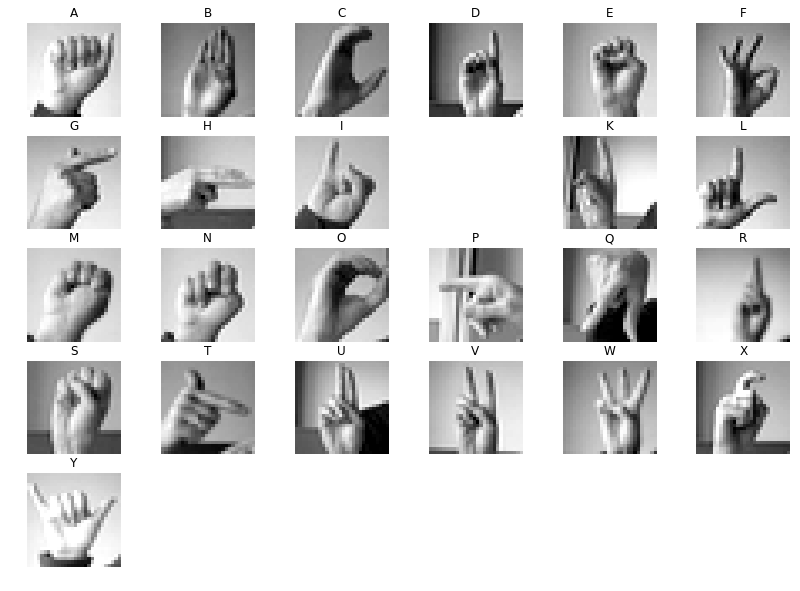

In [22]:
# Display all sign language alphabet
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 10))
for index in range(0, 26):
    # find first element of letter and get index inside y_train[]
    signIndex = next((i for i in range(1000) if y_train[i] == index), None)
    if index == 0:
        SIGN_A = signIndex
    #print(index, signIndex)
    if signIndex == None:
        continue
    nextSign = X_train[signIndex]
    nextSignImage = nextSign.reshape(28,28)
    plt.subplot(5, 6, index+1)
    plt.axis('off')
    plt.imshow(nextSignImage, cmap = matplotlib.cm.gray, interpolation="nearest")
    plt.title('%c' % (65+index))
plt.show()

In [23]:
# 'elasticnet' - elastic Net Regression
sgd_clf = SGDClassifier(random_state = 42, max_iter=5,n_jobs=-1, penalty='elasticnet') #use all cpu cores
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=-1, penalty='elasticnet', power_t=0.5, random_state=42,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [24]:
print("elasticnet testing test set accuracy...")
sgd_clf.score(X_test, y_test,sample_weight=None)

elasticnet testing test set accuracy...


0.56037367540435024

In [25]:
# 'l2' - Ridge Regression
sgd_clf = SGDClassifier(random_state = 42, max_iter=5,n_jobs=-1, penalty='l2') #use all cpu cores
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=-1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [26]:
print("Ridge testing test set accuracy...")
sgd_clf.score(X_test, y_test,sample_weight=None)

Ridge testing test set accuracy...


0.5349972113775795

In [27]:
# 'l1' - Lasso Regression
sgd_clf = SGDClassifier(random_state = 42, max_iter=5,n_jobs=-1, penalty='l1') #use all cpu cores
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=-1, penalty='l1', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [28]:
print("Lasso testing test set accuracy...")
sgd_clf.score(X_test, y_test,sample_weight=None)

Lasso testing test set accuracy...


0.63329615170105968

In [ ]:
#end

In [108]:
# confusion matric computation returning predictions made on each test fold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3, n_jobs=-1)
#confusion_matrix(y_train, y_train_pred)


In [109]:
# Precision of the classifier =  TP/(TP + FP)
# Recall (sensitivity) = TP/(TP+FN)
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred, average='weighted')  

0.80996685933696688

In [110]:
recall_score(y_train, y_train_pred, average='weighted')

0.73564013840830444

In [111]:
#Combining precision and recall into once metric - F1 score (harmonic mean)
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred, average='weighted')

0.73560618309876025

In [112]:
print("Number of binary classifiers trained: ",len(sgd_clf.classes_))

Number of binary classifiers trained:  24


In [113]:
#cross-validation using K-fold with 3 folds
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3,scoring="accuracy")


array([ 0.75605763,  0.77545892,  0.67530905])

In [114]:
# Trying regularisation by scaling inputs
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([ 0.9349487 ,  0.92690122,  0.94464501])

# ERROR ANALYSIS

In [115]:
#reduce sgd_clf max-iter
# from sklearn.linear_model import SGDClassifier
# from sklearn.model_selection import cross_val_predict
# from sklearn.metrics import confusion_matrix
# sgd_clf = SGDClassifier(random_state = 42, max_iter=10,n_jobs=-1) #use all cpu cores

#calculaing confusion matrix for SGDClassifier
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)

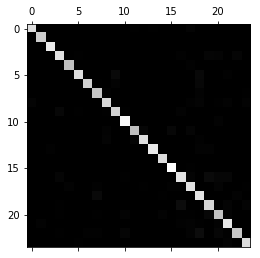

In [116]:
# plotting confusion matrix
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [117]:
#comparing error rates rather than absolute number of erors
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

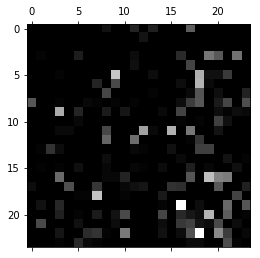

In [118]:
np.fill_diagonal(norm_conf_mx, 0)
#plt.figure(figsize=(10, 10))
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
#save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

# rows represent actual classes
# columns represent predicted classes
# bright columsn show that 17 and 18 are often misclassified

Regularization Penalty	options 

None				
Precision		0.86166454197778186
Recall			0.86533121033367444
Cross val score		[ 0.87415411, 0.85150787, 0.85931517 ] 
After standard scaler	[ 0.99126828,  0.99322552,  0.99190461]

l2 Ridge Regression
Precision		0.81904380441234192
Recall			0.70515388818065927
f1 score		0.71834434667571201
Cross val score		[ 0.68172888,  0.76453234,  0.6691828 ]
After standard scaler	[ 0.92032307,  0.92591783,  0.92473471]

l1 Lasso Regression !!!
Precision		0.88401972705933329
Recall			0.88104170460753961
f1 score		0.88162503204234455
Cross val score		[ 0.88681511,  0.88024476,  0.87605295]
After standard scaler	[ 0.99148657,  0.9920236 ,  0.9882945]

elasticnet
Precision		0.80996685933696688
Recall			0.73564013840830444
f1 score		0.73560618309876025
Cross val score		[ 0.75605763,  0.77545892,  0.67530905]
After standard scaler	[ 0.9349487 ,  0.92690122,  0.94464501]